In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import plot_model
from collections import Counter
from imblearn.over_sampling import SMOTE

In [31]:
dataset=pd.read_csv('breast-cancer.csv')

In [32]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [34]:
dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [35]:
dataset = dataset.drop(columns = ['id'])

In [36]:
print(dataset.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [37]:
dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

C:\Users\Tripti Mishra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

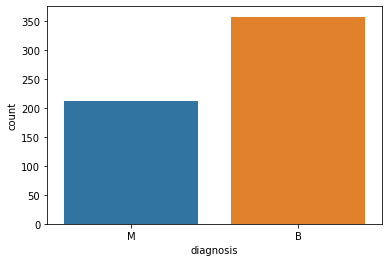

In [38]:
sns.countplot(dataset['diagnosis'])

In [39]:
dataset['diagnosis'].replace({"M":"1","B":"0" },inplace = True)

In [40]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
dataset['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

<AxesSubplot:>

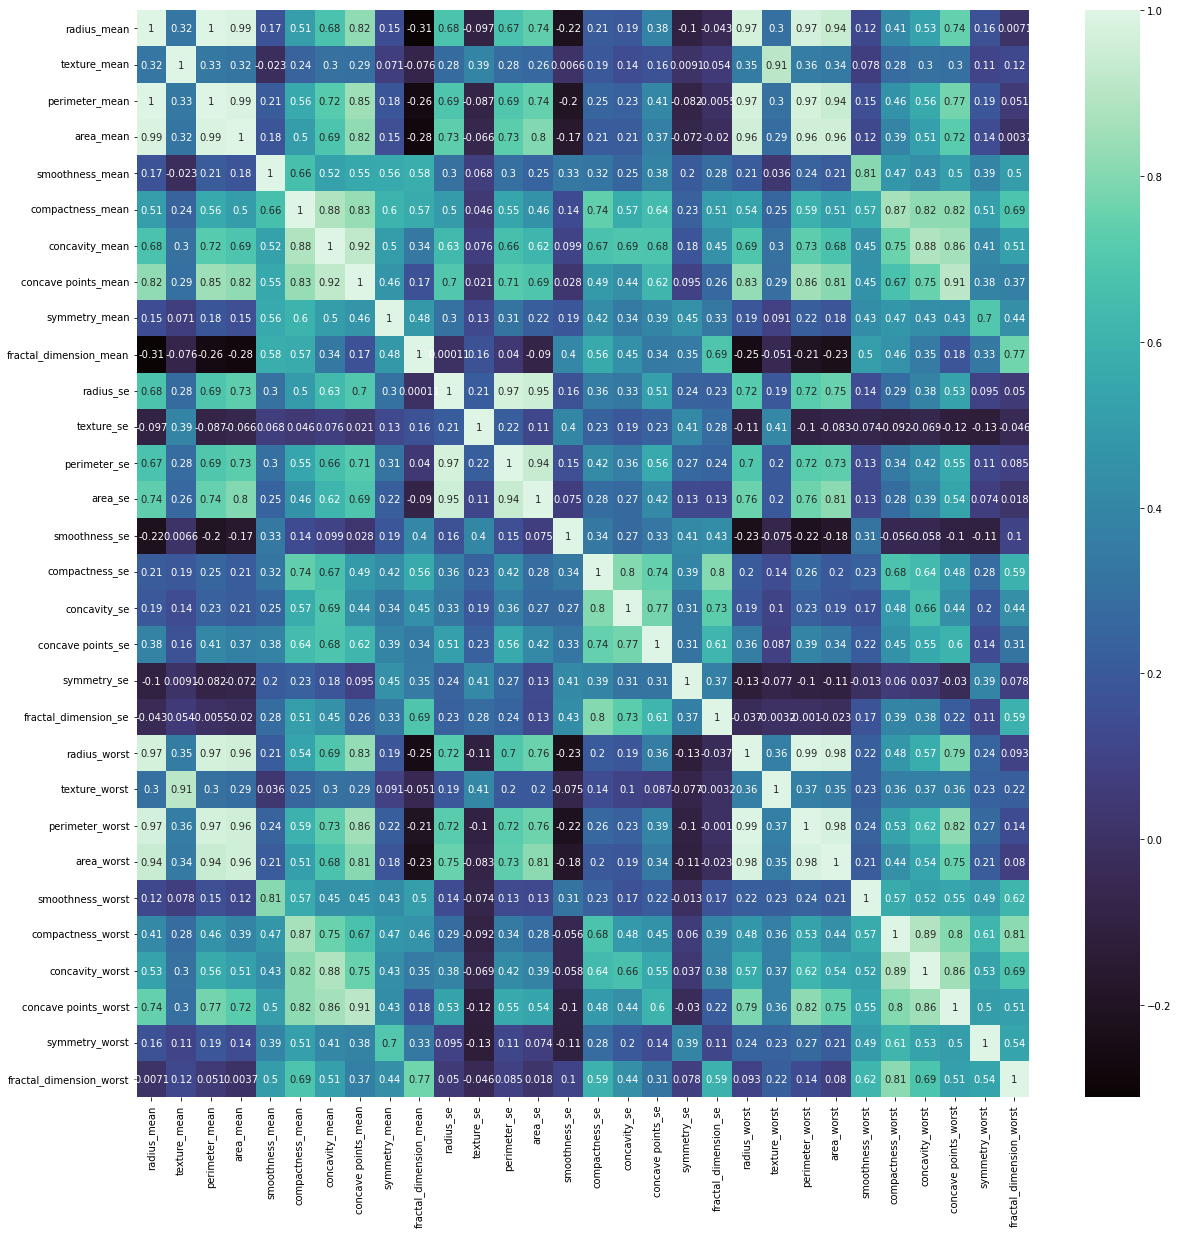

In [42]:
plt.figure(figsize=(20, 20))
sns.heatmap(dataset.corr(), annot=True, cmap = "mako")

In [43]:
X = dataset.drop(['diagnosis'],axis =1)
y = dataset['diagnosis']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
print( X_train.shape) 
print( y_train.shape) 
print (X_test.shape) 
print( y_test.shape) 

(398, 30)
(398,)
(171, 30)
(171,)


In [47]:
class_counts = y_train.value_counts()
class_counts

0    249
1    149
Name: diagnosis, dtype: int64

In [48]:
from sklearn.linear_model import LogisticRegression
indivisual_models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}

In [49]:
individual_model_results = {}

# Create empty dictionaries to store ROC-AUC results
individual_roc_auc_results = {}


In [50]:
for model_name, model in indivisual_models.items():
    print(f"Evaluating {model_name}...")
    
    # Evaluate ensemble models with cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    avg_cv_score = np.mean(cv_scores)
    
    # Evaluate individual models
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate evaluation metrics
    y_test = y_test.astype(int)
    y_pred = y_pred.astype(int)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    

    
    # Store results for individual models
    individual_model_results[model_name] = {
        "Cross-Validation Mean Accuracy": avg_cv_score,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
    }
for model_name, model in indivisual_models.items():
    print()
    print(model_name)
    print(individual_model_results[model_name])
    print()


Evaluating Logistic Regression...
Evaluating SVM...
Evaluating Naive Bayes...

Logistic Regression
{'Cross-Validation Mean Accuracy': 0.969873417721519, 'Precision': 0.953125, 'Recall': 0.9682539682539683, 'F1 Score': 0.9606299212598425, 'ROC AUC': 0.9958847736625513}


SVM
{'Cross-Validation Mean Accuracy': 0.9648734177215189, 'Precision': 0.967741935483871, 'Recall': 0.9523809523809523, 'F1 Score': 0.96, 'ROC AUC': 0.996031746031746}


Naive Bayes
{'Cross-Validation Mean Accuracy': 0.9347784810126581, 'Precision': 0.90625, 'Recall': 0.9206349206349206, 'F1 Score': 0.9133858267716536, 'ROC AUC': 0.9839800117577895}



Evaluating Logistic Regression...


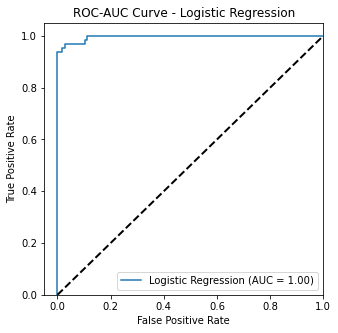

Evaluating SVM...


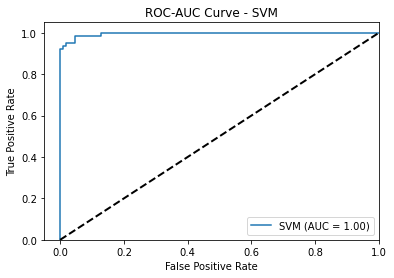

Evaluating Naive Bayes...


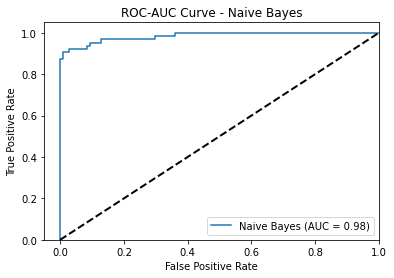

In [93]:
# Plot ROC-AUC curves for each individual model
plt.figure(figsize=(5,5))
for model_name, model in indivisual_models.items():
    print(f"Evaluating {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Predict the probabilities of the positive class
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Calculate AUC (ROC-AUC)
    roc_auc = auc(fpr, tpr)
    
    # Store results for individual models
    individual_roc_auc_results[model_name] = {
        "fpr": fpr,
        "tpr": tpr,
        "roc_auc": roc_auc
    }
    
    # Plot ROC curve for the individual model
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    # Add a diagonal line for reference
    plt.plot([0, 1], [0, 1], 'k--', lw=2)

    # Configure plot
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-AUC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()



In [52]:
ensemble_models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "XGBoost": xgb.XGBClassifier(n_estimators=100) 
}

In [53]:
ensemble_model_results = {}
ensemble_roc_auc_results = {}


In [57]:
y_train = y_train.astype(int)
for model_name, model in ensemble_models.items():
    print(f"Evaluating {model_name}...")
    
    # Evaluate ensemble models with cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    avg_cv_score = np.mean(cv_scores)
    
    # Fit the ensemble model on the full training data
    model.fit(X_train, y_train)
    
    # Predictions on the test data
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate evaluation metrics
    y_test = y_test.astype(int)
    y_pred = y_pred.astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Store results for ensemble models
    ensemble_model_results[model_name] = {
        "Cross-Validation Mean Accuracy": avg_cv_score,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
    }
for model_name, model in ensemble_models.items():
    print()
    print(model_name)
    print(ensemble_model_results[model_name])
    print()
    


Evaluating Random Forest...
Evaluating AdaBoost...
Evaluating XGBoost...

Random Forest
{'Cross-Validation Mean Accuracy': 0.9498101265822786, 'Accuracy': 0.9590643274853801, 'Precision': 0.9666666666666667, 'Recall': 0.9206349206349206, 'F1 Score': 0.943089430894309, 'ROC AUC': 0.9797912992357436}


AdaBoost
{'Cross-Validation Mean Accuracy': 0.9473101265822784, 'Accuracy': 0.9590643274853801, 'Precision': 0.9375, 'Recall': 0.9523809523809523, 'F1 Score': 0.9448818897637795, 'ROC AUC': 0.9879482657260436}


XGBoost
{'Cross-Validation Mean Accuracy': 0.9598101265822784, 'Accuracy': 0.935672514619883, 'Precision': 0.9482758620689655, 'Recall': 0.873015873015873, 'F1 Score': 0.9090909090909091, 'ROC AUC': 0.9863315696649031}



Evaluating Random Forest...


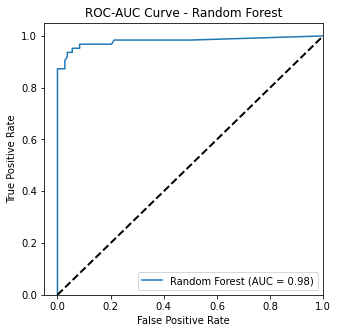

Evaluating AdaBoost...


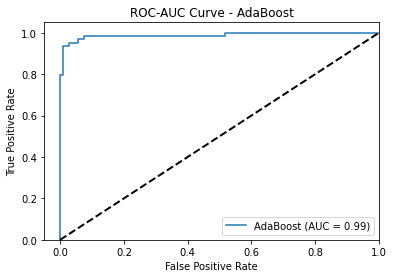

Evaluating XGBoost...


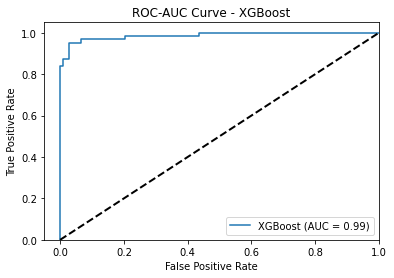

In [92]:
# Plot ROC-AUC curves for each individual model
plt.figure(figsize=(5,5))
for model_name, model in ensemble_models.items():
    print(f"Evaluating {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the probabilities of the positive class
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Calculate AUC (ROC-AUC)
    roc_auc = auc(fpr, tpr)
    
    # Store results for individual models
    ensemble_roc_auc_results[model_name] = {
        "fpr": fpr,
        "tpr": tpr,
        "roc_auc": roc_auc
    }
    
    # Plot ROC curve for the individual model
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    # Add a diagonal line for reference
    plt.plot([0, 1], [0, 1], 'k--', lw=2)

    # Configure plot
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-AUC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# # Add a diagonal line for reference
# plt.plot([0, 1], [0, 1], 'k--', lw=2)

# # Configure plot
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC-AUC Curve - Individual Model Comparison')
# plt.legend(loc="lower right")
# plt.show()

Evaluating Logistic Regression
Evaluating SVM
Evaluating Naive Bayes


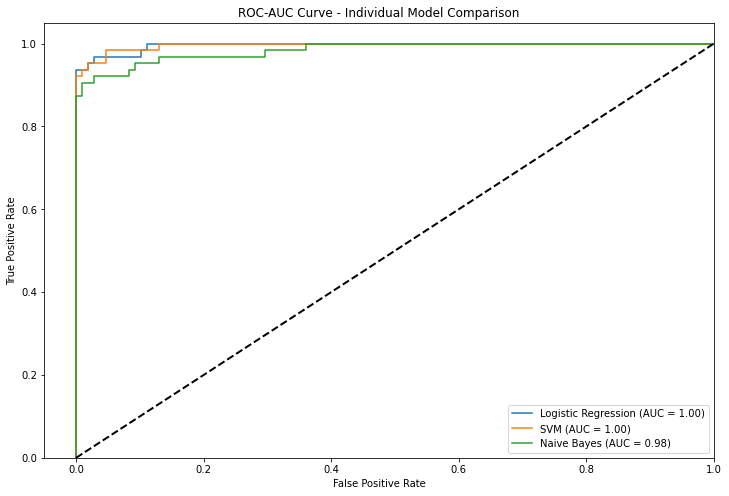

Evaluating Random Forest
Evaluating AdaBoost
Evaluating XGBoost


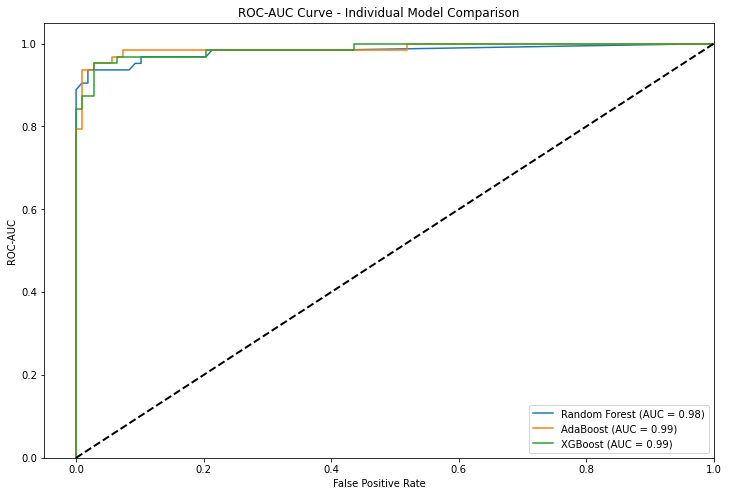

In [82]:
# Create empty dictionaries to store ROC-AUC results
individual_roc_auc_results = {}
ensemble_roc_auc_results = {}

# Plot ROC-AUC curves for each individual model
plt.figure(figsize=(12, 8))
for model_name, model in indivisual_models.items():
    print(f"Evaluating {model_name}")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the probabilities of the positive class
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Calculate AUC (ROC-AUC)
    roc_auc = auc(fpr, tpr)
    
    # Store results for individual models
    individual_roc_auc_results[model_name] = roc_auc
    
    # Plot ROC curve for the individual model
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Add a diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve - Individual Model Comparison')
plt.legend(loc="lower right")
plt.show()

# Plot ROC-AUC curves for ensemble models
plt.figure(figsize=(12, 8))
for model_name, model in ensemble_models.items():
    print(f"Evaluating {model_name}")
    
    # Train the ensemble model
    model.fit(X_train, y_train)
    
    # Predict the probabilities of the positive class
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Calculate AUC (ROC-AUC)
    roc_auc = auc(fpr, tpr)
    
    # Store results for ensemble models
    ensemble_roc_auc_results[model_name] = roc_auc
    
    # Plot ROC curve for the ensemble model
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Add a diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlim([-0.05, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('ROC-AUC')
plt.title('ROC-AUC Curve - Individual Model Comparison')
plt.legend(loc="lower right")
plt.show()


In [83]:
model = Sequential()

model.add(Dense(128, activation = 'relu', input_shape = (30,)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())


model.add(Dense(1, activation='sigmoid'))

In [84]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [85]:
history= model.fit(x = X_train, y = y_train, validation_split=0.2, epochs=20,batch_size=32, verbose=True)

Epoch 1/20
10/10 [==============================] - 7s 86ms/step - loss: 0.7670 - accuracy: 0.6132 - val_loss: 0.6429 - val_accuracy: 0.7625
Epoch 2/20
10/10 [==============================] - 0s 12ms/step - loss: 0.3624 - accuracy: 0.8396 - val_loss: 0.5072 - val_accuracy: 0.9125
Epoch 3/20
10/10 [==============================] - 0s 12ms/step - loss: 0.2874 - accuracy: 0.8994 - val_loss: 0.4135 - val_accuracy: 0.9375
Epoch 4/20
10/10 [==============================] - 0s 12ms/step - loss: 0.2395 - accuracy: 0.9214 - val_loss: 0.3487 - val_accuracy: 0.9375
Epoch 5/20
10/10 [==============================] - 0s 12ms/step - loss: 0.1985 - accuracy: 0.9371 - val_loss: 0.2994 - val_accuracy: 0.9375
Epoch 6/20
10/10 [==============================] - 0s 12ms/step - loss: 0.1662 - accuracy: 0.9528 - val_loss: 0.2602 - val_accuracy: 0.9625
Epoch 7/20
10/10 [==============================] - 0s 12ms/step - loss: 0.1605 - accuracy: 0.9434 - val_loss: 0.2322 - val_accuracy: 0.9625
Epoch 8/20
10

In [86]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [87]:
y_pred = model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


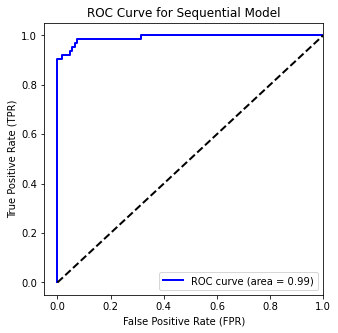

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Sequential Model')
plt.legend(loc='lower right')
plt.show()